In [27]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import os
import matplotlib.pyplot as plt


In [28]:
train_dir = 'C:/Users/Corrupted/Desktop/S_output/train'
test_dir = 'C:/Users/Corrupted/Desktop/S_output/test'
val_dir = 'C:/Users/Corrupted/Desktop/S_output/val'


In [29]:
diseases_name = []
for image_class in os.listdir(train_dir):
    diseases_name.append(image_class)
print(diseases_name)
print(f'Total Disease: {len(diseases_name)}')


['S_Bad', 'S_Good']
Total Disease: 2


In [30]:
train_data = image_dataset_from_directory(train_dir, label_mode="binary",
                                          image_size=(227, 227), batch_size=32,
                                          # color_mode='grayscale',
                                          shuffle=True, seed=42)
test_data = image_dataset_from_directory(test_dir, label_mode="binary",
                                         image_size=(227, 227), batch_size=32,
                                         # color_mode='grayscale',
                                         shuffle=False, seed=42)
val_data = image_dataset_from_directory(val_dir, label_mode="binary",
                                        image_size=(227, 227), batch_size=32,
                                        # color_mode='grayscale',
                                        shuffle=False, seed=42)


Found 207 files belonging to 2 classes.
Found 30 files belonging to 2 classes.
Found 59 files belonging to 2 classes.


In [31]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=6,
                                              min_delta=0.0001)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2,
                                                 patience=4, min_lr=1e-7)


In [32]:
def AlexNet(input_shape, n_class):

    X_input = Input(shape=input_shape, name="input_layer")

    X = Conv2D(96, (11, 11), strides=4, name="conv0")(X_input)
    X = BatchNormalization(axis=3, name="bn0")(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=2, name='max0')(X)

    X = Conv2D(256, (5, 5), padding='same', name='conv1')(X)
    X = BatchNormalization(axis=3, name='bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=2, name='max1')(X)

    X = Conv2D(384, (3, 3), padding='same', name='conv2')(X)
    X = BatchNormalization(axis=3, name='bn2')(X)
    X = Activation('relu')(X)

    X = Conv2D(384, (3, 3), padding='same', name='conv3')(X)
    X = BatchNormalization(axis=3, name='bn3')(X)
    X = Activation('relu')(X)

    X = Conv2D(256, (3, 3), padding='same', name='conv4')(X)
    X = BatchNormalization(axis=3, name='bn4')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=2, name='max2')(X)

    X = Flatten()(X)

    X = Dense(4096, activation='relu', name="fc0")(X)
    X = Dense(4096, activation='relu', name='fc1')(X)
    X = Dense(1, activation='sigmoid', name='output')(X)

    model = Model(X_input, X)

    return model


In [33]:
input_shape = (227, 227, 3)
n_class = len(diseases_name)
model = AlexNet(input_shape, n_class)
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation_10 (Activation)  (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [34]:
# Display the Model
# ! pip install visualkeras
# import visualkeras
# visualkeras.layered_view(model)


In [35]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# model.compile(optimizer='adam', loss='squared_hinge',
#               metrics=['accuracy'])   # SVM


In [36]:
hist = model.fit(train_data, epochs=100, validation_data=val_data,
                 callbacks=[early_stop, reduce_lr])


Epoch 1/100
7/7 [==============================] - 15s 2s/step - loss: 33.8971 - accuracy: 0.5507 - val_loss: 353.9763 - val_accuracy: 0.6441 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 13s 2s/step - loss: 3.0969 - accuracy: 0.4976 - val_loss: 96.7614 - val_accuracy: 0.6441 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 21s 3s/step - loss: 1.6831 - accuracy: 0.4783 - val_loss: 180.6802 - val_accuracy: 0.6441 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 20s 3s/step - loss: 1.0175 - accuracy: 0.5700 - val_loss: 41.2425 - val_accuracy: 0.3559 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 22s 3s/step - loss: 0.7669 - accuracy: 0.6329 - val_loss: 4.2335 - val_accuracy: 0.3729 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 22s 3s/step - loss: 0.6938 - accuracy: 0.6039 - val_loss: 1.3584 - val_accuracy: 0.3390 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 22s 3s/step - loss: 0.6637 - a

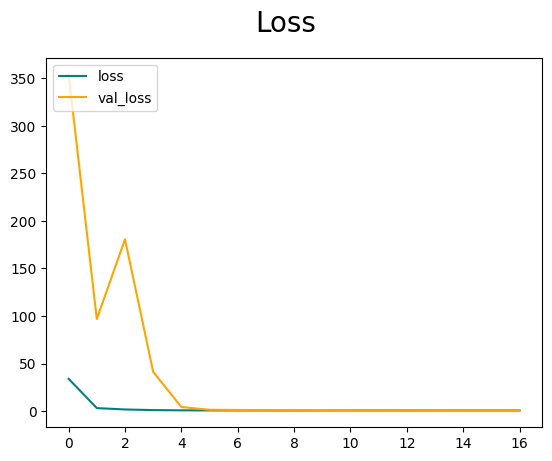

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


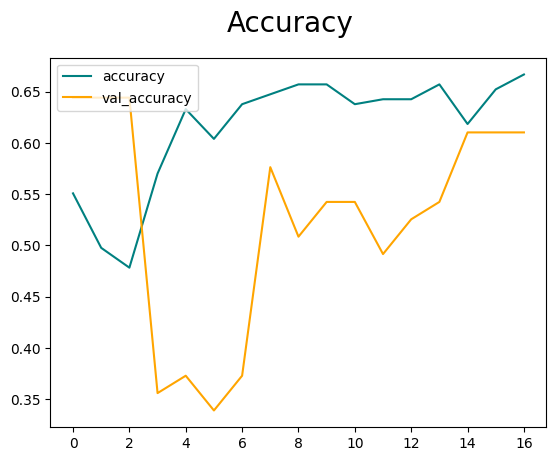

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [39]:
print(f"Training Accuracy: {hist.history['accuracy'][-1]}")
print(f"Validation Accuracy: {hist.history['val_accuracy'][-1]}")


Training Accuracy: 0.6666666865348816
Validation Accuracy: 0.6101694703102112
